# Used car prices - Autotrade

## Deep Learning Model - Linear Regression

#### Data source: https://www.autotrader.com.au/
#### Scope: Perth WA, 25km radius from postcode 6000

In [241]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [242]:
#  Read the csv file
df_used_cars = pd.read_csv('data_cleaning_output/used_cars_dataset_complete.csv')
df_used_cars.head()

,Year model,Car Spec,Kilometres,Price,Transmission,Body type,Drive type,Fuel type,Fuel consumption per 100km,Colour ext,...,Fuel tank capacity,Valve gear type,Peak torque (Nm),Horsepower,Kerb weight,Make,Model,Variant,Lat,Lon
0,2019,2019 Hyundai I30 Active PD2 MY19,74070,20998,Automatic,Hatch,Front Wheel Drive,Unleaded Petrol,7.4,Silver,...,50,16,203,161,1276,Hyundai,I30,Active,-32.016689,115.932215
1,2019,2019 Hyundai I30 Active PD2 MY19,66975,21998,Automatic,Hatch,Front Wheel Drive,Unleaded Petrol,7.4,Silver,...,50,16,203,161,1276,Hyundai,I30,Active,-32.016689,115.932215
2,2019,2019 Hyundai I30 Active PD2 MY19,68845,21998,Automatic,Hatch,Front Wheel Drive,Unleaded Petrol,7.4,Silver,...,50,16,203,161,1276,Hyundai,I30,Active,-32.016689,115.932215
3,2017,2017 Mitsubishi Triton GLX (4X4) MQ MY18,188978,24750,Automatic,Ute tray,Four Wheel Drive,Diesel,7.6,White,...,75,16,430,179,1930,Mitsubishi,Triton,GLX (4X4),-31.987188,115.935923
4,2016,2016 Mitsubishi Triton GLX (4X4) MQ MY16,141855,26900,Automatic,Ute tray,Four Wheel Drive,Diesel,7.6,White,...,75,16,430,179,1930,Mitsubishi,Triton,GLX (4X4),-31.987188,115.935923


In [243]:
# Value cound for Make
df_used_cars['Make'].value_counts()

Toyota           420
Ford             192
Hyundai          185
Mitsubishi       170
Holden           141
Mazda            124
Volkswagen       124
Nissan           119
Kia               95
Subaru            93
Suzuki            57
Jeep              54
MG                53
Honda             39
BMW               36
Isuzu             34
Audi              28
Mercedes-Benz     26
Land Rover        22
GWM               17
Renault           12
Lexus             12
LDV               11
Porsche           11
Mini               9
Volvo              9
Skoda              5
Peugeot            4
Fiat               3
Dodge              3
Chrysler           3
HSV                3
Jaguar             3
Ssangyong          2
Ram                2
Alfa Romeo         2
Maserati           1
Foton              1
Haval              1
Name: Make, dtype: int64

In [244]:
# Binning transmission values for items < 20
make = df_used_cars['Make'].value_counts()
make_replace = list(make[make < 10].index)

for trans in make_replace:
    df_used_cars['Make'] = df_used_cars['Make'].replace(trans,"Other")

df_used_cars['Make'].value_counts()

Toyota           420
Ford             192
Hyundai          185
Mitsubishi       170
Holden           141
Volkswagen       124
Mazda            124
Nissan           119
Kia               95
Subaru            93
Suzuki            57
Jeep              54
MG                53
Other             51
Honda             39
BMW               36
Isuzu             34
Audi              28
Mercedes-Benz     26
Land Rover        22
GWM               17
Lexus             12
Renault           12
Porsche           11
LDV               11
Name: Make, dtype: int64

In [245]:
# Check columns
df_used_cars.columns

Index(['Year model', 'Car Spec', 'Kilometres', 'Price', 'Transmission',
       'Body type', 'Drive type', 'Fuel type', 'Fuel consumption per 100km',
       'Colour ext', 'VIN', 'Dealer', 'Address', 'Seating capacity', 'Doors',
       'CC', 'Number of cylinders', 'Fuel tank capacity', 'Valve gear type',
       'Peak torque (Nm)', 'Horsepower', 'Kerb weight', 'Make', 'Model',
       'Variant', 'Lat', 'Lon'],
      dtype='object')

In [246]:
# Drop the non-beneficial ID columns: 'Car Spec', 'VIN', 'Dealer', 'Address', 'Model', 'Variant', 'Lat', 'Lon'.
df_used_cars.drop(['Car Spec', 'VIN', 'Dealer', 'Address', 'Model', 'Variant', 'Lat', 'Lon'], axis=1, inplace=True)
df_used_cars.head()

,Year model,Kilometres,Price,Transmission,Body type,Drive type,Fuel type,Fuel consumption per 100km,Colour ext,Seating capacity,Doors,CC,Number of cylinders,Fuel tank capacity,Valve gear type,Peak torque (Nm),Horsepower,Kerb weight,Make
0,2019,74070,20998,Automatic,Hatch,Front Wheel Drive,Unleaded Petrol,7.4,Silver,5,4,1999,4,50,16,203,161,1276,Hyundai
1,2019,66975,21998,Automatic,Hatch,Front Wheel Drive,Unleaded Petrol,7.4,Silver,5,4,1999,4,50,16,203,161,1276,Hyundai
2,2019,68845,21998,Automatic,Hatch,Front Wheel Drive,Unleaded Petrol,7.4,Silver,5,4,1999,4,50,16,203,161,1276,Hyundai
3,2017,188978,24750,Automatic,Ute tray,Four Wheel Drive,Diesel,7.6,White,5,4,2440,4,75,16,430,179,1930,Mitsubishi
4,2016,141855,26900,Automatic,Ute tray,Four Wheel Drive,Diesel,7.6,White,5,4,2440,4,75,16,430,179,1930,Mitsubishi


In [247]:
# Check shape of the df
df_used_cars.shape

(2126, 19)

In [248]:
# Check datatypes and null values
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year model                  2126 non-null   int64  
 1   Kilometres                  2126 non-null   int64  
 2   Price                       2126 non-null   int64  
 3   Transmission                2126 non-null   object 
 4   Body type                   2126 non-null   object 
 5   Drive type                  2126 non-null   object 
 6   Fuel type                   2126 non-null   object 
 7   Fuel consumption per 100km  2126 non-null   float64
 8   Colour ext                  2126 non-null   object 
 9   Seating capacity            2126 non-null   int64  
 10  Doors                       2126 non-null   int64  
 11  CC                          2126 non-null   int64  
 12  Number of cylinders         2126 non-null   int64  
 13  Fuel tank capacity          2126 

In [249]:
# Check numeric fields
df_used_cars.describe()

,Year model,Kilometres,Price,Fuel consumption per 100km,Seating capacity,Doors,CC,Number of cylinders,Fuel tank capacity,Valve gear type,Peak torque (Nm),Horsepower,Kerb weight
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,2016.758231,93261.811853,35800.234713,7.899577,5.211195,4.014581,2461.892286,4.503293,68.448730,17.736595,322.371590,187.008467,1689.005174
std,4.209442,69020.977561,24222.916707,1.909637,1.139282,0.647365,879.679089,1.114076,23.786956,4.248986,129.994057,61.743591,386.488439
min,1997.000000,1.000000,5400.000000,1.900000,2.000000,2.000000,998.000000,3.000000,32.000000,8.000000,100.000000,69.000000,865.000000
25%,2014.000000,42759.750000,20888.000000,6.700000,5.000000,4.000000,1987.000000,4.000000,55.000000,16.000000,205.000000,148.000000,1380.500000
50%,2018.000000,78733.000000,28984.500000,7.700000,5.000000,4.000000,2360.000000,4.000000,63.000000,16.000000,320.000000,175.000000,1622.000000
75%,2020.000000,130581.500000,43612.500000,8.800000,5.000000,4.000000,2953.000000,4.000000,76.000000,16.000000,430.000000,202.000000,2003.750000
max,2023.000000,495397.000000,239900.000000,18.600000,14.000000,5.000000,6424.000000,8.000000,180.000000,32.000000,740.000000,577.000000,2800.000000


### Understanding the distribution of the data and the relationships between different variables and the target variable 'Price'

#### Numerical Data

In [250]:
# Get columns for numerical values only
df_used_cars.describe().columns

Index(['Year model', 'Kilometres', 'Price', 'Fuel consumption per 100km',
       'Seating capacity', 'Doors', 'CC', 'Number of cylinders',
       'Fuel tank capacity', 'Valve gear type', 'Peak torque (Nm)',
       'Horsepower', 'Kerb weight'],
      dtype='object')

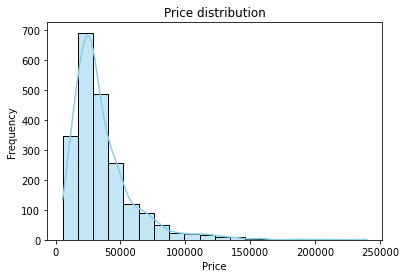

In [251]:
# Distirbution of the price
sns.histplot(df_used_cars['Price'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.savefig('plots/histogram_of_price')
plt.show()


Correlation Price vs Year model: 0.5078589942504984


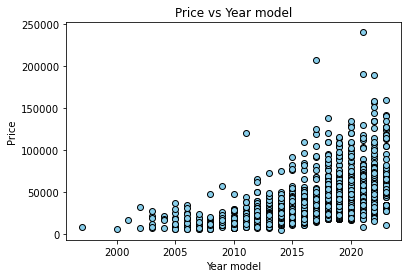

In [252]:
# Price vs Year model
corr_year = df_used_cars['Price'].corr(df_used_cars['Year model'])
print(f'Correlation Price vs Year model: {corr_year}')

plt.scatter(df_used_cars['Year model'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Year model')
plt.ylabel('Price')
plt.title('Price vs Year model')
plt.savefig('plots/scatter_of_price_vs_year')
plt.show()

Correlation Price vs Kilometres: -0.4335564962364339


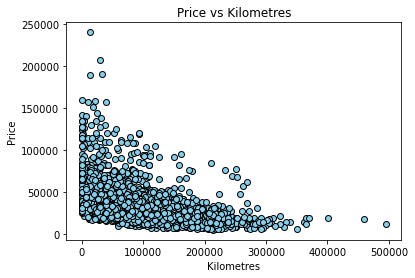

In [253]:
# Price vs Kilometres driven
corr_km = df_used_cars['Price'].corr(df_used_cars['Kilometres'])
print(f'Correlation Price vs Kilometres: {corr_km}')

plt.scatter(df_used_cars['Kilometres'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.title('Price vs Kilometres')
plt.savefig('plots/scatter_of_price_vs_kilometres')
plt.show()

Correlation Price vs Fuel consumption per 100km: 0.18468597372116446


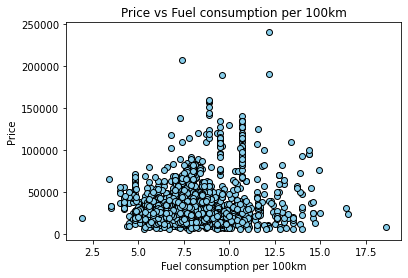

In [254]:
# Price vs Fuel consumption per 100km
corr_fuel_cons = df_used_cars['Price'].corr(df_used_cars['Fuel consumption per 100km'])
print(f'Correlation Price vs Fuel consumption per 100km: {corr_fuel_cons}')

plt.scatter(df_used_cars['Fuel consumption per 100km'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Fuel consumption per 100km')
plt.ylabel('Price')
plt.title('Price vs Fuel consumption per 100km')
plt.savefig('plots/scatter_of_price_vs_fuel_consumption')
plt.show()

Correlation Price vs Seating capacity: 0.09846531907183965


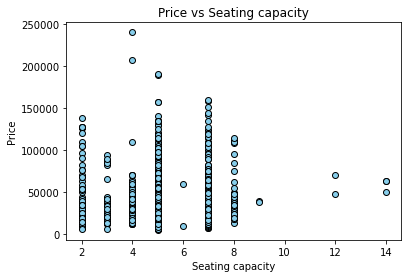

In [255]:
# Price vs Seating capacity
corr_seats = df_used_cars['Price'].corr(df_used_cars['Seating capacity'])
print(f'Correlation Price vs Seating capacity: {corr_seats}')

plt.scatter(df_used_cars['Seating capacity'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Seating capacity')
plt.ylabel('Price')
plt.title('Price vs Seating capacity')
plt.savefig('plots/scatter_of_price_vs_seating')
plt.show()

Correlation Price vs Doors: -0.16485402909876745


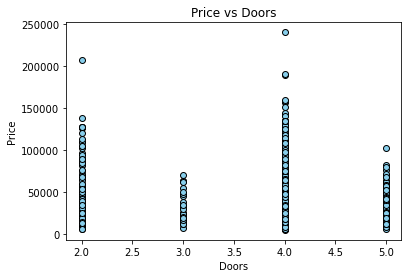

In [256]:
# Price vs doors
corr_doors = df_used_cars['Price'].corr(df_used_cars['Doors'])
print(f'Correlation Price vs Doors: {corr_doors}')

plt.scatter(df_used_cars['Doors'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.title('Price vs Doors')
plt.savefig('plots/scatter_of_price_vs_doors')
plt.show()

Correlation Price vs CC: 0.42329759319249805


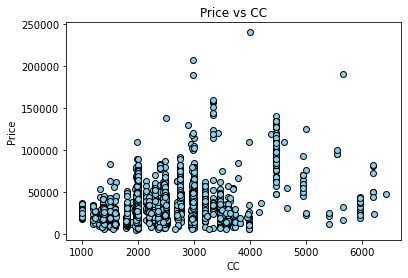

In [257]:
# Price vs CC
corr_cc = df_used_cars['Price'].corr(df_used_cars['CC'])
print(f'Correlation Price vs CC: {corr_cc}')

plt.scatter(df_used_cars['CC'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('CC')
plt.ylabel('Price')
plt.title('Price vs CC')
plt.savefig('plots/scatter_of_price_vs_cc')
plt.show()

Correlation Price vs Number of cylinders: 0.41151224033774153


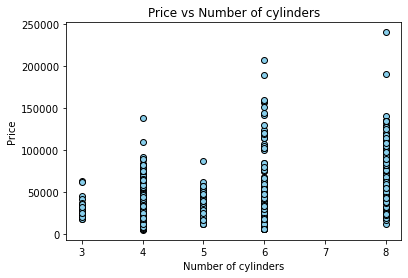

In [258]:
# Price vs Number of cylinders
corr_cyl = df_used_cars['Price'].corr(df_used_cars['Number of cylinders'])
print(f'Correlation Price vs Number of cylinders: {corr_cyl}')

plt.scatter(df_used_cars['Number of cylinders'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Number of cylinders')
plt.ylabel('Price')
plt.title('Price vs Number of cylinders')
plt.savefig('plots/scatter_of_price_vs_cylinders')
plt.show()

Correlation Price vs Fuel tank capacity: 0.5068554976298506


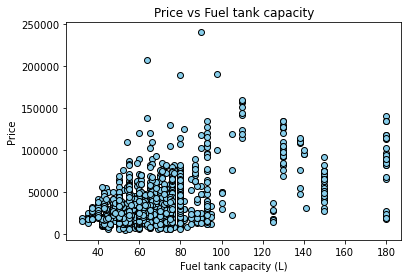

In [259]:
# Price vs Fuel tank capacity
corr_f_tank = df_used_cars['Price'].corr(df_used_cars['Fuel tank capacity'])
print(f'Correlation Price vs Fuel tank capacity: {corr_f_tank}')

plt.scatter(df_used_cars['Fuel tank capacity'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Fuel tank capacity (L)')
plt.ylabel('Price')
plt.title('Price vs Fuel tank capacity')
plt.savefig('plots/scatter_of_price_vs_fuel_tank')
plt.show()

Correlation Price vs Valve gear type: 0.427463930541418


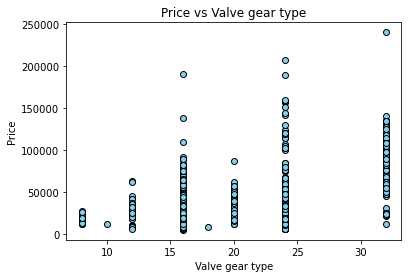

In [260]:
# Price vs Valve gear type
corr_val = df_used_cars['Price'].corr(df_used_cars['Valve gear type'])
print(f'Correlation Price vs Valve gear type: {corr_val}')

plt.scatter(df_used_cars['Valve gear type'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Valve gear type')
plt.ylabel('Price')
plt.title('Price vs Valve gear type')
plt.savefig('plots/scatter_of_price_vs_valve')
plt.show()

Correlation Price vs Peak torque (Nm): 0.5568736631534936


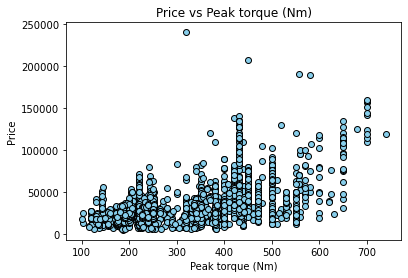

In [261]:
# Price vs Peak torque (Nm)
corr_tor = df_used_cars['Price'].corr(df_used_cars['Peak torque (Nm)'])
print(f'Correlation Price vs Peak torque (Nm): {corr_tor}')

plt.scatter(df_used_cars['Peak torque (Nm)'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Peak torque (Nm)')
plt.ylabel('Price')
plt.title('Price vs Peak torque (Nm)')
plt.savefig('plots/scatter_of_price_vs_torque')
plt.show()

Correlation Price vs Horsepower: 0.4336217614469676


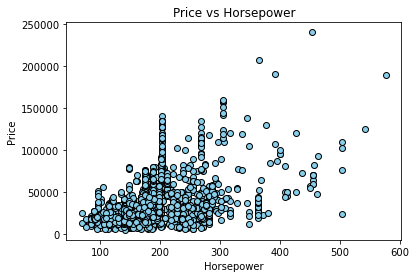

In [262]:
# Price vs Horsepower
corr_hp = df_used_cars['Price'].corr(df_used_cars['Horsepower'])
print(f'Correlation Price vs Horsepower: {corr_hp}')

plt.scatter(df_used_cars['Horsepower'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Price vs Horsepower')
plt.savefig('plots/scatter_of_price_vs_horsepower')
plt.show()

Correlation Price vs Kerb weight: 0.5564041299513199


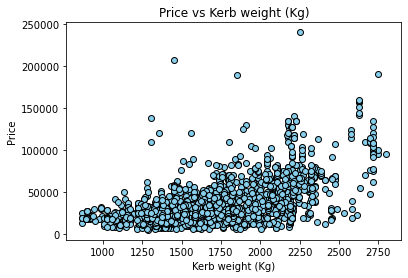

In [263]:
# Price vs Kerb weight
corr_weight = df_used_cars['Price'].corr(df_used_cars['Kerb weight'])
print(f'Correlation Price vs Kerb weight: {corr_weight}')

plt.scatter(df_used_cars['Kerb weight'], df_used_cars['Price'], color='skyblue', edgecolor='black')
plt.xlabel('Kerb weight (Kg)')
plt.ylabel('Price')
plt.title('Price vs Kerb weight (Kg)')
plt.savefig('plots/scatter_of_price_vs_weight')
plt.show()

#### Categorical data

In [264]:
# Get columns
df_used_cars.columns

Index(['Year model', 'Kilometres', 'Price', 'Transmission', 'Body type',
       'Drive type', 'Fuel type', 'Fuel consumption per 100km', 'Colour ext',
       'Seating capacity', 'Doors', 'CC', 'Number of cylinders',
       'Fuel tank capacity', 'Valve gear type', 'Peak torque (Nm)',
       'Horsepower', 'Kerb weight', 'Make'],
      dtype='object')

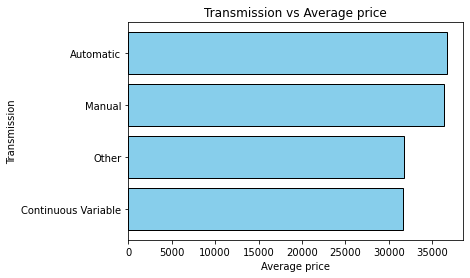

In [265]:
# Transmission vs Average price
mean_price_by_body_type = df_used_cars.groupby('Transmission')['Price'].mean()
mean_price_by_body_type = mean_price_by_body_type.sort_values(ascending=True)
plt.barh(mean_price_by_body_type.index, mean_price_by_body_type.values, color='skyblue', edgecolor='black')
plt.xlabel('Average price')
plt.ylabel('Transmission')
plt.title('Transmission vs Average price')
plt.savefig('plots/hbar_of_body_type_vs_transmission')
plt.show()

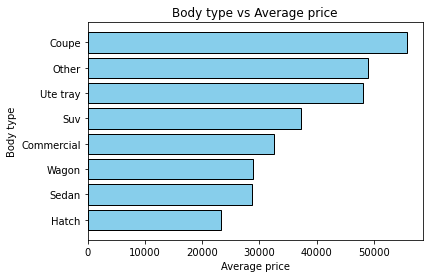

In [266]:
# Body type vs Average price
mean_price_by_body_type = df_used_cars.groupby('Body type')['Price'].mean()
mean_price_by_body_type = mean_price_by_body_type.sort_values(ascending=True)
plt.barh(mean_price_by_body_type.index, mean_price_by_body_type.values, color='skyblue', edgecolor='black')
plt.xlabel('Average price')
plt.ylabel('Body type')
plt.title('Body type vs Average price')
plt.savefig('plots/hbar_of_body_type_vs_avg_price')
plt.show()

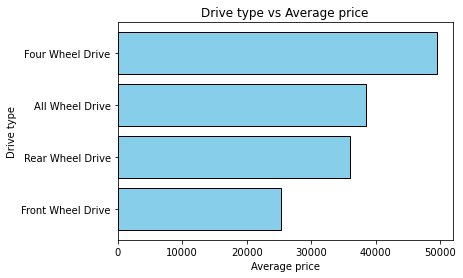

In [267]:
# Drive type vs Average price
mean_price_by_body_type = df_used_cars.groupby('Drive type')['Price'].mean()
mean_price_by_body_type = mean_price_by_body_type.sort_values(ascending=True)
plt.barh(mean_price_by_body_type.index, mean_price_by_body_type.values, color='skyblue', edgecolor='black')
plt.xlabel('Average price')
plt.ylabel('Drive type')
plt.title('Drive type vs Average price')
plt.savefig('plots/hbar_of_drive_type_vs_avg_price')
plt.show()

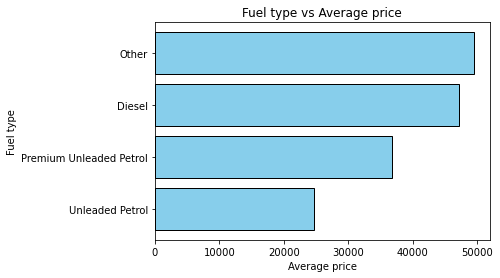

In [268]:
# Fuel type vs Average price
mean_price_by_body_type = df_used_cars.groupby('Fuel type')['Price'].mean()
mean_price_by_body_type = mean_price_by_body_type.sort_values(ascending=True)
plt.barh(mean_price_by_body_type.index, mean_price_by_body_type.values, color='skyblue', edgecolor='black')
plt.xlabel('Average price')
plt.ylabel('Fuel type')
plt.title('Fuel type vs Average price')
plt.savefig('plots/hbar_of_fuel_type_vs_avg_price')
plt.show()

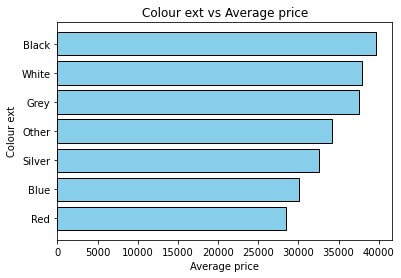

In [269]:
# Colour ext vs Average price
mean_price_by_body_type = df_used_cars.groupby('Colour ext')['Price'].mean()
mean_price_by_body_type = mean_price_by_body_type.sort_values(ascending=True)
plt.barh(mean_price_by_body_type.index, mean_price_by_body_type.values, color='skyblue', edgecolor='black')
plt.xlabel('Average price')
plt.ylabel('Colour ext')
plt.title('Colour ext vs Average price')
plt.savefig('plots/hbar_of_colour_vs_avg_price')
plt.show()

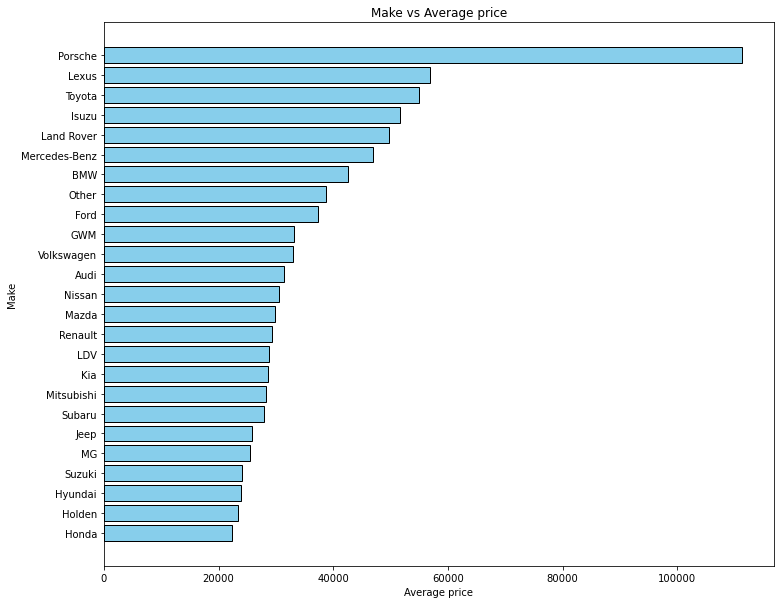

In [270]:
# Make vs Average Price
mean_price_by_body_type = df_used_cars.groupby('Make')['Price'].mean()
mean_price_by_body_type = mean_price_by_body_type.sort_values(ascending=True)
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
plt.barh(mean_price_by_body_type.index, mean_price_by_body_type.values, color='skyblue', edgecolor='black')
plt.xlabel('Average price')
plt.ylabel('Make')
plt.title('Make vs Average price')
plt.savefig('plots/hbar_of_make_vs_avg_price')
plt.show()

#### Preprocessing data

In [271]:
# Get columns
df_used_cars.columns

Index(['Year model', 'Kilometres', 'Price', 'Transmission', 'Body type',
       'Drive type', 'Fuel type', 'Fuel consumption per 100km', 'Colour ext',
       'Seating capacity', 'Doors', 'CC', 'Number of cylinders',
       'Fuel tank capacity', 'Valve gear type', 'Peak torque (Nm)',
       'Horsepower', 'Kerb weight', 'Make'],
      dtype='object')

In [272]:
# Create new dataframe with relevant feautures that influence the price
relevant_features = ['Year model', 'Kilometres', 'Price', 'Body type',
       'Drive type', 'Fuel type', 'CC', 'Number of cylinders',
       'Fuel tank capacity', 'Valve gear type', 'Peak torque (Nm)',
       'Horsepower', 'Kerb weight', 'Make']

df_relevant = df_used_cars[relevant_features]
df_relevant.head()

,Year model,Kilometres,Price,Body type,Drive type,Fuel type,CC,Number of cylinders,Fuel tank capacity,Valve gear type,Peak torque (Nm),Horsepower,Kerb weight,Make
0,2019,74070,20998,Hatch,Front Wheel Drive,Unleaded Petrol,1999,4,50,16,203,161,1276,Hyundai
1,2019,66975,21998,Hatch,Front Wheel Drive,Unleaded Petrol,1999,4,50,16,203,161,1276,Hyundai
2,2019,68845,21998,Hatch,Front Wheel Drive,Unleaded Petrol,1999,4,50,16,203,161,1276,Hyundai
3,2017,188978,24750,Ute tray,Four Wheel Drive,Diesel,2440,4,75,16,430,179,1930,Mitsubishi
4,2016,141855,26900,Ute tray,Four Wheel Drive,Diesel,2440,4,75,16,430,179,1930,Mitsubishi


In [273]:
# Check for null values and data types
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year model           2126 non-null   int64 
 1   Kilometres           2126 non-null   int64 
 2   Price                2126 non-null   int64 
 3   Body type            2126 non-null   object
 4   Drive type           2126 non-null   object
 5   Fuel type            2126 non-null   object
 6   CC                   2126 non-null   int64 
 7   Number of cylinders  2126 non-null   int64 
 8   Fuel tank capacity   2126 non-null   int64 
 9   Valve gear type      2126 non-null   int64 
 10  Peak torque (Nm)     2126 non-null   int64 
 11  Horsepower           2126 non-null   int64 
 12  Kerb weight          2126 non-null   int64 
 13  Make                 2126 non-null   object
dtypes: int64(10), object(4)
memory usage: 232.7+ KB


In [274]:
# Encode the categorical values
df_encoded = pd.get_dummies(df_relevant, drop_first=True)
df_encoded

,Year model,Kilometres,Price,CC,Number of cylinders,Fuel tank capacity,Valve gear type,Peak torque (Nm),Horsepower,Kerb weight,...,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Other,Make_Porsche,Make_Renault,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen
0,2019,74070,20998,1999,4,50,16,203,161,1276,...,0,0,0,0,0,0,0,0,0,0
1,2019,66975,21998,1999,4,50,16,203,161,1276,...,0,0,0,0,0,0,0,0,0,0
2,2019,68845,21998,1999,4,50,16,203,161,1276,...,0,0,0,0,0,0,0,0,0,0
3,2017,188978,24750,2440,4,75,16,430,179,1930,...,0,1,0,0,0,0,0,0,0,0
4,2016,141855,26900,2440,4,75,16,430,179,1930,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2019,83433,107999,4461,8,93,32,650,269,2720,...,0,0,0,0,0,0,0,0,1,0
2122,2020,16120,65999,2755,4,80,16,500,202,2155,...,0,0,0,0,0,0,0,0,1,0
2123,2020,65576,74999,2755,4,150,16,450,175,2385,...,0,0,0,0,0,0,0,0,1,0
2124,2020,22250,64999,1996,4,80,16,500,211,2413,...,0,0,0,0,0,0,0,0,0,0


In [275]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('Price', axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.drop('Price', axis=1).columns)
df_scaled['Price'] = df_encoded['Price']
df_scaled.head()

,Year model,Kilometres,CC,Number of cylinders,Fuel tank capacity,Valve gear type,Peak torque (Nm),Horsepower,Kerb weight,Body type_Coupe,...,Make_Mitsubishi,Make_Nissan,Make_Other,Make_Porsche,Make_Renault,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Price
0,0.532682,-0.278123,-0.526330,-0.451864,-0.775764,-0.408804,-0.918501,-0.421333,-1.068861,-0.113416,...,-0.294809,-0.2435,-0.156775,-0.072118,-0.075342,-0.213881,-0.165981,-0.496175,-0.248874,20998
1,0.532682,-0.380942,-0.526330,-0.451864,-0.775764,-0.408804,-0.918501,-0.421333,-1.068861,-0.113416,...,-0.294809,-0.2435,-0.156775,-0.072118,-0.075342,-0.213881,-0.165981,-0.496175,-0.248874,21998
2,0.532682,-0.353843,-0.526330,-0.451864,-0.775764,-0.408804,-0.918501,-0.421333,-1.068861,-0.113416,...,-0.294809,-0.2435,-0.156775,-0.072118,-0.075342,-0.213881,-0.165981,-0.496175,-0.248874,21998
3,0.057448,1.387096,-0.024893,-0.451864,0.275479,-0.408804,0.828143,-0.129736,0.623697,-0.113416,...,3.392032,-0.2435,-0.156775,-0.072118,-0.075342,-0.213881,-0.165981,-0.496175,-0.248874,24750
4,-0.180169,0.704201,-0.024893,-0.451864,0.275479,-0.408804,0.828143,-0.129736,0.623697,-0.113416,...,3.392032,-0.2435,-0.156775,-0.072118,-0.075342,-0.213881,-0.165981,-0.496175,-0.248874,26900


In [276]:
# Split the data into features (X) and target variable (y)
X = df_scaled.drop('Price', axis=1)
y = df_scaled['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Check sizes of the data
print(f'Train X data: {X_train.shape}')
print(f'Test X data: {X_test.shape}')
print('--------------------------')
print(f'Train y data: {y_train.shape}')
print(f'Test y data: {y_test.shape}')

Train X data: (1594, 46)
Test X data: (532, 46)
--------------------------
Train y data: (1594,)
Test y data: (532,)


#### Regression model

In [277]:
# Create model with scikit-learn
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [278]:
# Create a DataFrame to compare actual prices and predicted prices
df_comparison = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
df_comparison.head(10)

,Actual Price,Predicted Price
1048,28490,25959.996535
1224,78995,81037.571199
500,23888,22536.828927
1342,107990,89233.473851
2012,34990,39951.760460
224,15990,7870.986642
2055,39990,39455.733422
1111,72988,79653.854582
1881,21990,17403.676716
854,55990,59801.796895


In [279]:
# Compute metrics for linear regression model
score = model.score(X_test, y_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y_test - y_pred)

In [280]:
# Print relevant metrics
print(f"Model score: {score}")
print(f"R2 score: {r2}")
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"Standard deviation: {std}")

Model score: 0.7975937140501721
R2 score: 0.7975937140501721
Mean squared error: 104440963.2733744
Root mean squared error: 10219.636161496866
Standard deviation: 10219.542844763784
